In [33]:
# load_shapes.py

import glob, pandas as pd
from docx import Document
import re

# 첫 번째 테이블만 불러와 간단히 출력해 봅니다.
path = r"C:\Users\grace\OneDrive\Desktop\dataset\body_shape\남성_20대_치수.docx"
doc = Document(path)
table = doc.tables[0]

# 표 → DataFrame
data = [[cell.text.strip() for cell in row.cells] for row in table.rows]
df = pd.DataFrame(data[1:], columns=data[0])
print(df.head())


              변수 명 작은\n역삼각체형 큰\n삼각체형  사각체형
0  (101)머리위로뻗은주먹높이      2041    2049  2047
1           (102)키      1729    1735  1732
2         (103)눈높이      1613    1620  1617
3        (104)목뒤높이      1472    1479  1475
4        (105)어깨높이      1395    1403  1398


In [34]:
import glob
import pandas as pd
from docx import Document

def load_shape_tables_from_folder(folder_path):
    all_dfs = []
    # 폴더 내 .docx 파일 리스트
    for path in glob.glob(f"{folder_path}/*.docx"):
        # 파일명에서 메타(성별·연령대·체형) 추출 (필요에 따라 커스터마이징)
        fname = path.split("\\")[-1].rsplit(".",1)[0]
        gender, age_range, _ = fname.split("_", 2)
        
        # 문서 로드
        doc = Document(path)
        table = doc.tables[0]  # 첫 번째 표 가정
        
        # 표 → DataFrame
        data = [[cell.text.strip() for cell in row.cells] for row in table.rows]
        df = pd.DataFrame(data[1:], columns=data[0])
        
        # 메타 컬럼 추가
        df['gender']    = gender
        df['age_range'] = age_range
        
        all_dfs.append(df)
    
    # 모두 합치기
    combined = pd.concat(all_dfs, ignore_index=True, sort=False)
    return combined

# 사용 예
folder = r"C:\Users\grace\OneDrive\Desktop\dataset\body_shape"
df_all = load_shape_tables_from_folder(folder)

# 결과 확인
print(df_all.shape)
display(df_all.head())


(1190, 13)


,변수 명,작은\n역삼각체형,큰\n삼각체형,사각체형,gender,age_range,역삼각체형,작은\n사각체형,삼각체형,큰\n사각체형,큰 역삼각체형,작은사각체형(긴지체),작은사각체형(짧은지체)
0,(101)머리위로뻗은주먹높이,2041,2049,2047,남성,20대,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(102)키,1729,1735,1732,남성,20대,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(103)눈높이,1613,1620,1617,남성,20대,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,(104)목뒤높이,1472,1479,1475,남성,20대,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(105)어깨높이,1395,1403,1398,남성,20대,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df_all.columns = (df_all.columns
      .str.replace(r"[\s\n]+", "_", regex=True)
      .str.strip("_")
      .str.lower()
)

In [36]:
df_all

,변수_명,작은_역삼각체형,큰_삼각체형,사각체형,gender,age_range,역삼각체형,작은_사각체형,삼각체형,큰_사각체형,큰_역삼각체형,작은사각체형(긴지체),작은사각체형(짧은지체)
0,(101)머리위로뻗은주먹높이,2041,2049,2047,남성,20대,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(102)키,1729,1735,1732,남성,20대,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(103)눈높이,1613,1620,1617,남성,20대,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,(104)목뒤높이,1472,1479,1475,남성,20대,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(105)어깨높이,1395,1403,1398,남성,20대,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,(416)막대쥔손안둘레,87,NaN,83,여성,60대,NaN,NaN,82,85,NaN,NaN,NaN
1186,(417)손둘레,190,NaN,191,여성,60대,NaN,NaN,191,192,NaN,NaN,NaN
1187,(418)발너비,92,NaN,92,여성,60대,NaN,NaN,93,92,NaN,NaN,NaN
1188,(419)발직선길이,226,NaN,227,여성,60대,NaN,NaN,227,228,NaN,NaN,NaN


In [37]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   변수_명          1190 non-null   object
 1   작은_역삼각체형      714 non-null    object
 2   큰_삼각체형        476 non-null    object
 3   사각체형          714 non-null    object
 4   gender        1190 non-null   object
 5   age_range     1190 non-null   object
 6   역삼각체형         595 non-null    object
 7   작은_사각체형       476 non-null    object
 8   삼각체형          714 non-null    object
 9   큰_사각체형        476 non-null    object
 10  큰_역삼각체형       119 non-null    object
 11  작은사각체형(긴지체)   119 non-null    object
 12  작은사각체형(짧은지체)  119 non-null    object
dtypes: object(13)
memory usage: 121.0+ KB


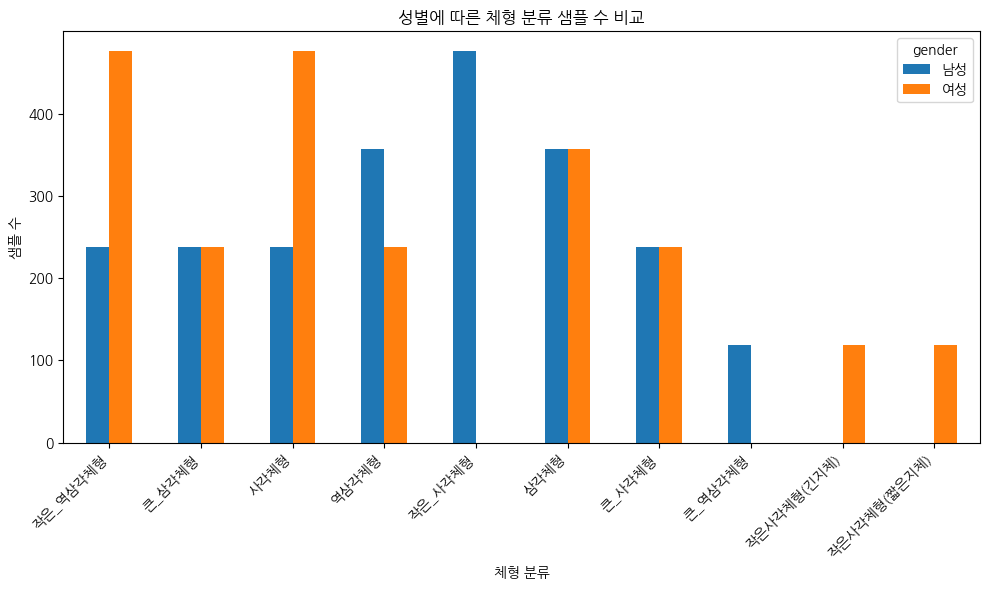

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_all is the DataFrame loaded previously
df = df_all.copy()

# List of shape columns
shape_cols = [
    "작은_역삼각체형", "큰_삼각체형", "사각체형",
    "역삼각체형", "작은_사각체형", "삼각체형",
    "큰_사각체형", "큰_역삼각체형",
    "작은사각체형(긴지체)", "작은사각체형(짧은지체)"
]

# Count non-null entries for each shape by gender
counts = df.groupby("gender")[shape_cols].apply(lambda g: g.notna().sum())

# Transpose for plotting
counts = counts.T

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
counts.plot(kind='bar', ax=ax)
ax.set_xlabel("체형 분류")
ax.set_ylabel("샘플 수")
ax.set_title("성별에 따른 체형 분류 샘플 수 비교")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [39]:
# import glob
# files = glob.glob(r"C:\Users\grace\OneDrive\Desktop\dataset\body_shape\*.docx")
# print(files)


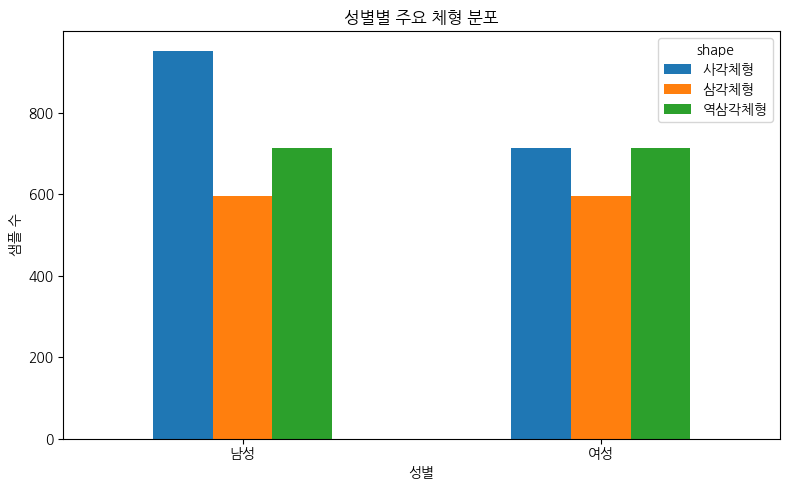

In [40]:
# 2) 매핑 정의
mapping = {
    "작은_역삼각체형": "역삼각체형",
    "역삼각체형":     "역삼각체형",
    "큰_역삼각체형":   "역삼각체형",
    "작은_사각체형":   "사각체형",
    "사각체형":       "사각체형",
    "큰_사각체형":     "사각체형",
    "작은_사각체형(긴지체)": "사각체형",
    "작은_사각체형(짧은지체)": "사각체형",
    "작은_삼각체형":   "삼각체형",
    "삼각체형":       "삼각체형",
    "큰_삼각체형":     "삼각체형"
}

# 3) 실제 존재하는 컬럼만 선택
available_cols = [col for col in mapping.keys() if col in df_all.columns]

# 4) melt 및 필터링
df_long = df_all.melt(
    id_vars=["gender"], value_vars=available_cols,
    var_name="detail_shape", value_name="measurement"
).dropna(subset=["measurement"])

# 5) 간략 체형으로 매핑
df_long["shape"] = df_long["detail_shape"].map(mapping)

# 6) 집계
count_df = df_long.groupby(["gender","shape"])["measurement"].count().unstack(fill_value=0)

# 7) 시각화
fig, ax = plt.subplots(figsize=(8,5))
count_df.plot(kind='bar', ax=ax)
ax.set_title("성별별 주요 체형 분포")
ax.set_xlabel("성별")
ax.set_ylabel("샘플 수")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [41]:
import pandas as pd
import glob
from docx import Document
# 2) 상세 체형 컬럼 리스트
shape_cols = [c for c in df.columns 
              if c not in ('변수_명','gender','age_range')]

# 3) melt 후 “있음=1” 플래그
long = df.melt(
    id_vars=['gender','age_range'], 
    value_vars=shape_cols,
    var_name='detail_shape', 
    value_name='val'
).dropna(subset=['val'])

long['flag'] = 1

# 4) 간략 체형 매핑 (필요한 것만)
mapping = {
    "작은_역삼각체형": "역삼각체형", "역삼각체형": "역삼각체형", "큰_역삼각체형": "역삼각체형",
    "작은_삼각체형": "삼각체형",   "삼각체형":     "삼각체형",   "큰_삼각체형":    "삼각체형",
    "작은_사각체형": "사각체형", "사각체형":     "사각체형",   "큰_사각체형":    "사각체형"
}
long['shape'] = long['detail_shape'].map(mapping)

# 5) 피벗 테이블 생성
pivot = (
    long
    .pivot_table(
        index=['gender','age_range'], 
        columns='shape', 
        values='flag',
        aggfunc='sum',
        fill_value=0
    )
    .reset_index()
)

print(pivot)


shape gender age_range  사각체형  삼각체형  역삼각체형
0         남성       20대   119   119    119
1         남성       30대   119   119    238
2         남성       40대   238   119    119
3         남성       50대   357   119      0
4         남성       60대   119   119    238
5         여성       20대   119   119    238
6         여성       30대   119   119      0
7         여성       40대   119   119    238
8         여성       50대   119   119    119
9         여성       60대   238   119    119


In [42]:
# 1) melt(long) 포맷에 ‘변수_명’까지 포함해서
long2 = df.melt(
    id_vars=['gender','age_range','변수_명'],
    value_vars=shape_cols,
    var_name='detail_shape',
    value_name='val'
).dropna(subset=['val'])

# 2) flag=1 로 표시
long2['flag'] = 1

# 3) detail_shape → 간략체형 매핑
long2['shape'] = long2['detail_shape'].map(mapping)

# 4) 변수_명별 체형별 등장 횟수 pivot
pivot_vars = long2.pivot_table(
    index='변수_명',
    columns='shape',
    values='flag',
    aggfunc='sum',
    fill_value=0
)

# 5) 총합 열 추가(어떤 변수들이 가장 많이 체형 구분에 쓰였는지)
pivot_vars['total'] = pivot_vars.sum(axis=1)

# 6) 내림차순 정렬
pivot_vars = pivot_vars.sort_values('total', ascending=False)

print(pivot_vars.head(20))  # 상위 20개 변수_명 확인


shape             사각체형  삼각체형  역삼각체형  total
변수_명                                      
(101)머리위로뻗은주먹높이     14    10     12     36
(244)다리가쪽길이         14    10     12     36
(309)앉은엉덩이무릎수평길이    14    10     12     36
(308)앉은오금높이         14    10     12     36
(307)앉은무릎높이         14    10     12     36
(306)앉은넙다리높이        14    10     12     36
(305)앉은팔꿈치높이        14    10     12     36
(304)앉은어깨높이         14    10     12     36
(303)앉은목뒤높이         14    10     12     36
(302)앉은눈높이          14    10     12     36
(301)앉은키            14    10     12     36
(247)배꼽수준샅앞뒤길이      14    10     12     36
(246)샅앞뒤길이          14    10     12     36
(245)몸통세로둘레         14    10     12     36
(243)엉덩이옆길이         14    10     12     36
(311)앉은엉덩이배두께       14    10     12     36
(242)손목둘레           14    10     12     36
(241)팔꿈치둘레          14    10     12     36
(240)위팔둘레           14    10     12     36
(239)겨드랑둘레          14    10     12     36


In [47]:
unique_vars = df.iloc[:, 0].unique()
print(len(unique_vars), "개의 고유 변수명:")
for var in unique_vars:
    print(var)

119 개의 고유 변수명:
(101)머리위로뻗은주먹높이
(102)키
(103)눈높이
(104)목뒤높이
(105)어깨높이
(106)어깨가쪽높이
(107)겨드랑높이
(108)굽힌팔꿈치높이
(109)엉덩이높이
(110)샅높이
(111)주먹높이
(112)허리높이
(113)배꼽수준허리높이
(114)위앞엉덩뼈가시높이
(115)무릎높이
(116)가슴너비
(117)젖가슴너비
(118)허리너비
(119)배꼽수준허리너비
(120)엉덩이너비
(121)겨드랑두께
(122)가슴두께
(123)젖가슴두께
(124)허리두께
(125)배꼽수준허리두께
(126)엉덩이두께
(127)엉덩이수직길이
(128)몸통수직길이
(129)벽면앞으로뻗은주먹수평길이
(130)벽면몸통두께
(131)벽면어깨수평길이
(132)몸무게
(201)앞중심길이
(202)배꼽수준앞중심길이
(203)겨드랑앞벽사이길이
(204)겨드랑앞접힘사이길이
(205)젖꼭지사이수평길이(여)
(206)목둘레
(207)목밑둘레
(208)가슴둘레
(209)젖가슴둘레
(210)젖가슴아래둘레(여)
(211)허리둘레
(212)배꼽수준허리둘레
(213)엉덩이둘레
(214)넙다리둘레
(215)넙다리중간둘레
(216)무릎둘레
(217)무릎아래둘레
(218)장딴지둘레
(219)종아리최소둘레
(220)발목최대둘레
(221)어깨길이
(222)목뒤등뼈위겨드랑수준길이
(223)등길이
(224)배꼽수준등길이
(225)목뒤오금길이
(226)총길이
(227)넙다리길이
(228)어깨사이길이
(229)겨드랑뒤벽사이길이
(230)겨드랑뒤벽접힘사이길이
(231)목뒤젖꼭지길이
(232)목뒤젖꼭지허리둘레선길이
(233)목옆젖꼭지길이(여)
(234)목옆젖꼭지허리둘레선길이
(235)위팔길이
(236)팔길이
(237)팔안쪽길이
(238)목뒤손목안쪽길이
(239)겨드랑둘레
(240)위팔둘레
(241)팔꿈치둘레
(242)손목둘레
(243)엉덩이옆길이
(244)다리가쪽길이
(245)몸통세로둘레
(246)샅앞뒤길이
(247)배꼽수준샅앞뒤길이
(301)앉은키
(302)앉은눈높이
(303)앉은목뒤

In [ ]:
import os, re, glob
import pandas as pd
from docx import Document
from typing import Dict, List, Tuple

BASE_DIR = r"C:\Users\grace\OneDrive\Desktop\dataset\body_shape"

VAR_MAP = {
    "(102)": "height",        # 키
    "(128)": "torso_len",     # 몸통수직길이
    "(317)": "shoulder",      # 어깨너비
}

SHAPE_KEYWORDS = ["역삼각", "삼각", "사각"]  # 컬럼 순서 고정용

def parse_file_meta(fname: str) -> Tuple[str, str]:
    sex_match = re.search(r"(남성|남자|여성|여자)", fname)
    age_match = re.search(r"(\d{2}대)", fname)
    sex = sex_match.group(1) if sex_match else "Unknown"
    age = age_match.group(1) if age_match else "Unknown"
    return sex, age

def parse_docx_table(path: str) -> pd.DataFrame:
    """
    Size Korea용 docx는 대부분 ‘첫 번째 표’ 안에
    ┌─────────────┬──────────┬──────────┬──────────┐
    │ 변수 명      │ 작은역삼각 │ 큰삼각체형 │ 사각체형 │
    ├─────────────┼──────────┼──────────┼──────────┤
    │ (102)키      │ 1729     │ 1735     │ 1732     │
    └─────────────┴──────────┴──────────┴──────────┘
    형식으로 들어 있음.
    → 헤더에서 체형 키워드 포함 열만 뽑고, VAR_MAP에 있는
      변수 코드 행만 골라 DataFrame으로 반환.
    """
    doc = Document(path)
    if not doc.tables:
        return None
    table = doc.tables[0]

    # 표 전체를 2차원 리스트로 추출
    rows = [[cell.text.strip() for cell in row.cells] for row in table.rows]
    if not rows or len(rows) < 2:
        return None

    header = rows[0]                 # 첫 행 = 헤더
    col_idx_map = {}                 # {shape: column_index}

    # 헤더에서 '역삼각', '삼각', '사각' 키워드가 들어간 열 번호 찾기
    for shape in SHAPE_KEYWORDS:
        for idx, h in enumerate(header):
            if shape in h:
                col_idx_map[shape] = idx
                break

    # 핵심 키워드 열이 하나라도 없으면 파싱 실패
    if len(col_idx_map) < len(SHAPE_KEYWORDS):
        return None

    records = []  # -> [[var, val1, val2, val3], ...]

    # 나머지 행 순회
    for row in rows[1:]:
        first_cell = row[0].strip()
        code_match = re.match(r"^\(\d{3}\)", first_cell)   # '(102)...'
        if not code_match:
            continue

        code = code_match.group(0)        # '(102)'
        var  = VAR_MAP.get(code)
        if not var:
            continue                      # 관심 없는 변수는 스킵

        vals = []
        for shape in SHAPE_KEYWORDS:
            idx = col_idx_map[shape]
            cell_val = row[idx].replace(",", "").strip()
            try:
                vals.append(float(cell_val))
            except ValueError:
                vals.append(None)

        records.append([var] + vals)

    if not records:
        return None

    df = pd.DataFrame(records,
                      index=[r[0] for r in records],
                      columns=["var"] + SHAPE_KEYWORDS)
    df = df.drop(columns="var")
    return df

data_dict: Dict[str, pd.DataFrame] = {}
for fp in glob.glob(os.path.join(BASE_DIR, "*.docx")):
    df = parse_docx_table(fp)
    if df is not None and not df.empty:
        data_dict[os.path.basename(fp)] = df
    else:
        print(f"[경고] 파싱 실패 → {os.path.basename(fp)}")

print(f"파싱 성공 파일: {len(data_dict)}개")

records: List[Dict[str, object]] = []

for fname, df in data_dict.items():
    sex, age = parse_file_meta(fname)

    # 필수 변수 존재 확인
    for var in ["height", "shoulder", "torso_len"]:
        if var not in df.index:
            print(f"[주의] {fname} → {var} 빠짐")
            break
    else:
        for shape in SHAPE_KEYWORDS:
            h = df.loc["height", shape]
            s = df.loc["shoulder", shape]
            t = df.loc["torso_len", shape]
            if pd.isna(h) or pd.isna(s) or pd.isna(t):
                continue
            records.append({
                "src_file" : fname,
                "sex"      : sex,
                "age"      : age,
                "shape"    : shape,
                "shoulder_over_height": round(float(s)/float(h), 4),
                "torso_over_height"   : round(float(t)/float(h), 4),
            })

ratio_df = pd.DataFrame(records)
display(ratio_df.head())
pivot = ratio_df.pivot_table(index="shape",
                             values=["shoulder_over_height", "torso_over_height"],
                             aggfunc="mean")
display(pivot)

[경고] 파싱 실패 → 남성_50대_치수.docx
[경고] 파싱 실패 → 여성_30대_치수.docx
✔ 파싱 성공 파일: 8개

==== 미리 보기 ====


,src_file,sex,age,shape,shoulder_over_height,torso_over_height
0,남성_20대_치수.docx,남성,20대,역삼각,0.2325,0.3939
1,남성_20대_치수.docx,남성,20대,삼각,0.2325,0.3939
2,남성_20대_치수.docx,남성,20대,사각,0.2315,0.3920
3,남성_30대_치수.docx,남성,30대,역삼각,0.2307,0.3976
4,남성_30대_치수.docx,남성,30대,삼각,0.2307,0.3976


==== 체형별 평균 비율 ====


,shoulder_over_height,torso_over_height
shape,,
사각,0.228400,0.401075
삼각,0.232325,0.403275
역삼각,0.232013,0.403025


In [ ]:
import os, re, glob
import pandas as pd
from docx import Document
from typing import Dict, List, Tuple

BASE_DIR = r"C:\Users\grace\OneDrive\Desktop\dataset\body_shape"

VAR_MAP = {"(102)":"height", "(128)":"torso_len", "(317)":"shoulder"}

SHAPE_REGEX: Dict[str, str] = {
    "역삼각": r"역\s*삼각",
    "삼각"  : r"(?<!역)\s*삼각",   # '역삼각' 제외
    "사각"  : r"사각",
}

def parse_file_meta(fname: str) -> Tuple[str,str]:
    sex = re.search(r"(남성|남자|여성|여자)", fname)
    age = re.search(r"(\d{2}대)", fname)
    return (sex.group(1) if sex else "Unknown",
            age.group(1) if age else "Unknown")

from typing import Optional 

def parse_docx_table(path: str) -> Optional[pd.DataFrame]:
    doc = Document(path)
    if not doc.tables: return None
    tbl  = doc.tables[0]

    # 4-1) 표를 리스트로
    rows = [[c.text.strip() for c in r.cells] for r in tbl.rows]
    if len(rows)<2: return None
    header = rows[0]

    # 4-2) 헤더에서 shape 열 찾기 (있는 것만)
    col_idx: Dict[str,int] = {}
    for shape, rgx in SHAPE_REGEX.items():
        for idx, h in enumerate(header):
            if re.search(rgx, h):
                col_idx[shape]=idx
                break

    if not col_idx:           # 삼각/사각/역삼각 아무것도 못 찾음
        return None

    # 4-3) 데이터 행
    recs=[]
    for row in rows[1:]:
        m = re.match(r"^\(\d{3}\)", row[0])
        if not m: continue
        var=VAR_MAP.get(m.group(0))
        if not var: continue

        vals=[]
        for shape in col_idx:
            raw = row[col_idx[shape]].replace(",","")
            try: vals.append(float(raw))
            except ValueError: vals.append(None)
        recs.append([var]+vals)

    if not recs: return None

    # 4-4) DataFrame
    cols=["var"]+list(col_idx.keys())          # 동적
    df=pd.DataFrame(recs, columns=cols).set_index("var")
    return df

dset={}
for fp in glob.glob(os.path.join(BASE_DIR,"*.docx")):
    df=parse_docx_table(fp)
    if df is not None: dset[os.path.basename(fp)]=df
    else: print("[경고] 파싱 실패 →",os.path.basename(fp))
print("파싱 성공:",len(dset))

records=[]
for fname,df in dset.items():
    sex,age=parse_file_meta(fname)
    for shape in df.columns:                       # 있는 shape만
        try:
            h,s,t = df.at["height",shape], df.at["shoulder",shape], df.at["torso_len",shape]
        except KeyError: continue
        if pd.isna(h) or pd.isna(s) or pd.isna(t): continue
        records.append({"src":fname,"sex":sex,"age":age,"shape":shape,
                        "shoulder/height":round(s/h,4),
                        "torso/height"   :round(t/h,4)})

ratio_df=pd.DataFrame(records)
display(ratio_df.head())

pivot=ratio_df.pivot_table(index="shape",
                           values=["shoulder/height","torso/height"],aggfunc="mean")
display(pivot)


✔ 파싱 성공: 10


,src,sex,age,shape,shoulder/height,torso/height
0,남성_20대_치수.docx,남성,20대,역삼각,0.2325,0.3939
1,남성_20대_치수.docx,남성,20대,삼각,0.2311,0.3954
2,남성_20대_치수.docx,남성,20대,사각,0.2315,0.3920
3,남성_30대_치수.docx,남성,30대,역삼각,0.2307,0.3976
4,남성_30대_치수.docx,남성,30대,삼각,0.2322,0.4034


,shoulder/height,torso/height
shape,,
사각,0.228060,0.400040
삼각,0.230300,0.406280
역삼각,0.232013,0.403025


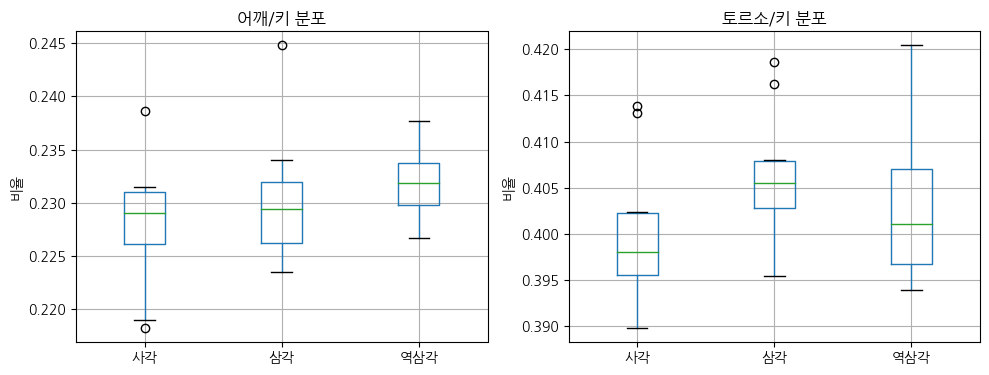

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

# 어깨/키
ratio_df.boxplot(column="shoulder/height", by="shape", ax=ax1)
ax1.set_title("어깨/키 분포"); ax1.set_xlabel(""); ax1.set_ylabel("비율")

# 토르소/키
ratio_df.boxplot(column="torso/height", by="shape", ax=ax2)
ax2.set_title("토르소/키 분포"); ax2.set_xlabel(""); ax2.set_ylabel("비율")

plt.suptitle("")           # 기본 suptitle 제거
plt.tight_layout()
plt.show()


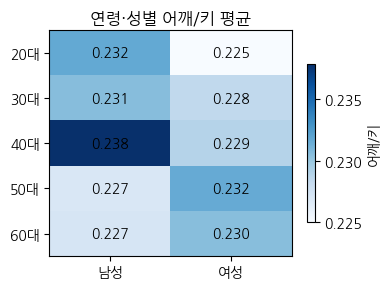

In [11]:
import numpy as np

# 연령·성별 그룹별 평균 shoulder/height
heat = ratio_df.pivot_table(index="age", columns="sex",
                            values="shoulder/height", aggfunc="mean")

fig, ax = plt.subplots(figsize=(4,3))
im = ax.imshow(heat.values, cmap="Blues", aspect="auto")

# 축 라벨
ax.set_xticks(np.arange(len(heat.columns)))
ax.set_xticklabels(heat.columns)
ax.set_yticks(np.arange(len(heat.index)))
ax.set_yticklabels(heat.index)
ax.set_title("연령·성별 어깨/키 평균")

# 값 표시
for i in range(heat.shape[0]):
    for j in range(heat.shape[1]):
        txt = f"{heat.iloc[i,j]:.3f}" if not np.isnan(heat.iloc[i,j]) else "-"
        ax.text(j, i, txt, ha="center", va="center", color="black")

plt.colorbar(im, ax=ax, shrink=0.7, label="어깨/키")
plt.tight_layout()
plt.show()


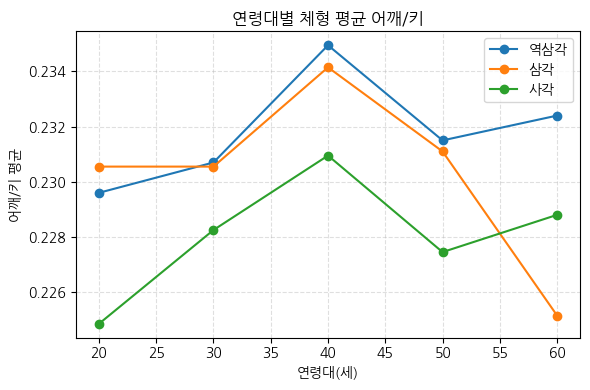

In [12]:
# age 컬럼은 '20대' 문자열이므로 숫자 변환
ratio_df["age_num"] = ratio_df["age"].str.extract(r"(\d{2})").astype(float)

fig, ax = plt.subplots(figsize=(6,4))
for shape in SHAPE_REGEX.keys():          # 역삼각·삼각·사각
    sub = ratio_df[ratio_df["shape"] == shape]
    sub.groupby("age_num")["shoulder/height"].mean().plot(ax=ax, marker="o", label=shape)

ax.set_xlabel("연령대(세)")
ax.set_ylabel("어깨/키 평균")
ax.set_title("연령대별 체형 평균 어깨/키")
ax.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

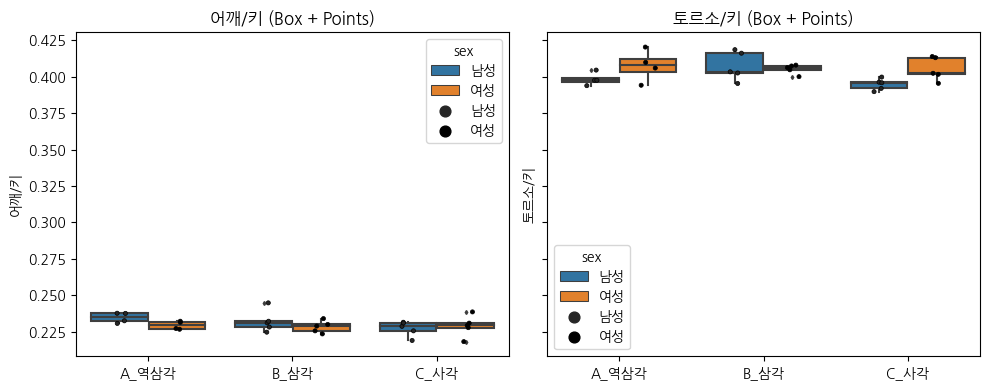

In [ ]:
# 성별이 달라도 같은 체형은 같은 분포일까,,?
# 1) 데이터 정리: 체형·성별 그룹핑
plot_df = ratio_df.copy()
plot_df["shape_kor"] = plot_df["shape"].map({"역삼각":"A_역삼각", "삼각":"B_삼각", "사각":"C_사각"})
# ── 앞에 A/B/C 를 붙여서 violin이 알파벳 순으로 정렬되도록
fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)

sns.boxplot(data=plot_df, x="shape_kor", y="shoulder/height",
            hue="sex", ax=axes[0], showcaps=False, fliersize=2)
sns.stripplot(data=plot_df, x="shape_kor", y="shoulder/height",
              hue="sex", dodge=True, ax=axes[0], color="black", size=3, linewidth=0.5)
axes[0].set_title("어깨/키 (Box + Points)"); axes[0].set_xlabel(""); axes[0].set_ylabel("어깨/키")

sns.boxplot(data=plot_df, x="shape_kor", y="torso/height",
            hue="sex", ax=axes[1], showcaps=False, fliersize=2)
sns.stripplot(data=plot_df, x="shape_kor", y="torso/height",
              hue="sex", dodge=True, ax=axes[1], color="black", size=3, linewidth=0.5)
axes[1].set_title("토르소/키 (Box + Points)"); axes[1].set_xlabel(""); axes[1].set_ylabel("토르소/키")
plt.tight_layout(); plt.show()



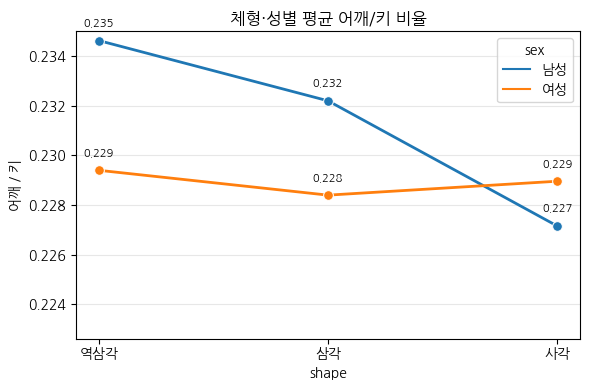

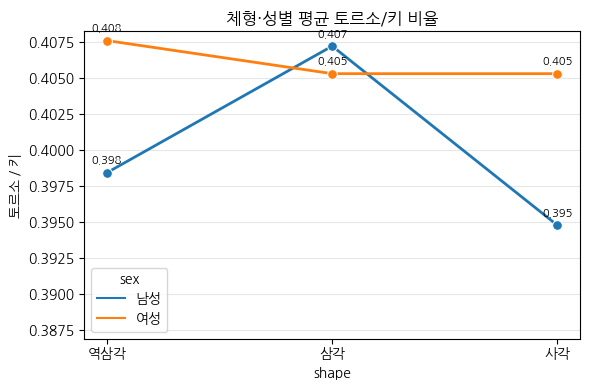

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

shape_order = ["역삼각", "삼각", "사각"]
ratio_df["shape"] = pd.Categorical(ratio_df["shape"], categories=shape_order, ordered=True)

def lineplot_by_shape(metric: str, ylabel: str, title: str):
    avg = (ratio_df
           .groupby(["shape","sex"])[metric]
           .mean()
           .reset_index())
    
    plt.figure(figsize=(6,4))
    sns.lineplot(data=avg, x="shape", y=metric, hue="sex",
                 marker="o", markersize=7, linewidth=2)
    
    # 각 포인트에 값 라벨(선택)
    for _, row in avg.iterrows():
        plt.text(row["shape"], row[metric]+0.0005, f"{row[metric]:.3f}",
                 ha="center", va="bottom", fontsize=8)
    
    plt.ylabel(ylabel); plt.title(title)
    plt.ylim(bottom=avg[metric].min()*0.98)
    plt.grid(axis="y", alpha=0.3); plt.tight_layout()
    plt.show()

lineplot_by_shape("shoulder/height", "어깨 / 키", "체형·성별 평균 어깨/키 비율")
lineplot_by_shape("torso/height",    "토르소 / 키", "체형·성별 평균 토르소/키 비율")


In [ ]:
from scipy import stats
import numpy as np

def effect_size_and_p(df, metric):
    men   = df[df.sex == "남성"][metric]
    women = df[df.sex == "여성"][metric]
    # 평균 차이 t-test
    t, p = stats.ttest_ind(men, women, equal_var=False)
    # 효과량 Cohen’s d
    d = (men.mean() - women.mean()) / np.sqrt(((men.var(ddof=1) + women.var(ddof=1)) / 2))
    return men.mean(), women.mean(), p, d

for m in ["shoulder/height", "torso/height"]:
    m_m, w_m, p, d = effect_size_and_p(ratio_df, m)
    print(f"{m:17s}  남={m_m:.4f}  여={w_m:.4f}  p={p:.4f}  d={d:.2f}")


shoulder/height    남=0.2311  여=0.2289  p=0.3072  d=0.39
torso/height       남=0.4003  여=0.4060  p=0.0632  d=-0.73


✔ 파싱 성공: 10


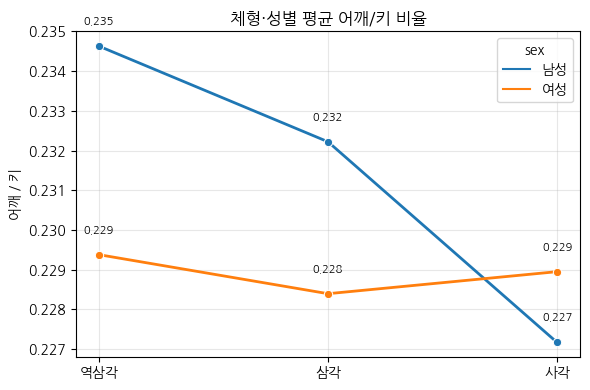

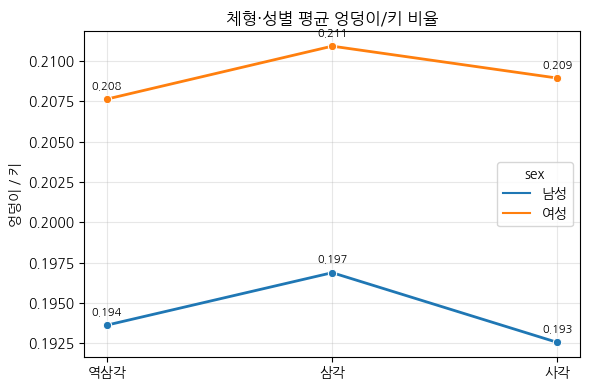

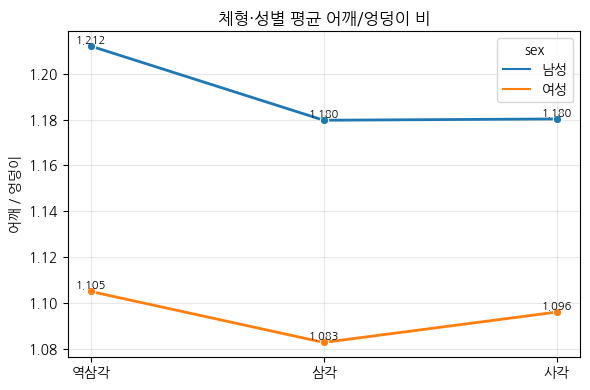

In [ ]:
import os, re, glob, numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from docx import Document
from typing import Optional, Dict, Tuple

BASE_DIR = r"C:\Users\grace\OneDrive\Desktop\dataset\body_shape" 

VAR_MAP = {
    "(102)": "height_mm",        # 키
    "(128)": "torso_mm",         # 몸통수직길이
    "(317)": "shoulder_mm",      # 어깨너비
    "(120)": "hip_width_mm",     # 엉덩이너비(골반폭)
    "(213)": "hip_girth_mm",     # 엉덩이둘레
    "(211)": "waist_girth_mm",   # 허리둘레
}

SHAPE_REGEX: Dict[str, str] = {
    "역삼각": r"역\s*삼각",
    "삼각"  : r"(?<!역)\s*삼각",   # '역삼각' 제외
    "사각"  : r"사각",
}

def parse_file_meta(fname: str) -> Tuple[str, str]:
    sex = re.search(r"(남성|남자|여성|여자)", fname)
    age = re.search(r"(\d{2}대)", fname)
    return (sex.group(1) if sex else "Unknown",
            age.group(1) if age else "Unknown")

def parse_docx_table(path: str) -> Optional[pd.DataFrame]:
    doc = Document(path)
    if not doc.tables:
        return None
    tbl = doc.tables[0]
    rows = [[c.text.strip() for c in r.cells] for r in tbl.rows]
    if len(rows) < 2:
        return None

    header = rows[0]
    col_idx: Dict[str, int] = {}
    for shape, rgx in SHAPE_REGEX.items():
        for idx, h in enumerate(header):
            if re.search(rgx, h):
                col_idx[shape] = idx
                break
    if not col_idx:            
        return None

    records = []
    for row in rows[1:]:
        m = re.match(r"^\(\d{3}\)", row[0])
        if not m:
            continue
        var = VAR_MAP.get(m.group(0))
        if not var:
            continue

        vals = []
        for shape in col_idx:
            raw = row[col_idx[shape]].replace(",", "")
            try:
                vals.append(float(raw))
            except ValueError:
                vals.append(np.nan)
        records.append([var] + vals)

    if not records:
        return None

    df = pd.DataFrame(records,
                      columns=["var"] + list(col_idx.keys())
                     ).set_index("var")
    return df

dset: Dict[str, pd.DataFrame] = {}
for fp in glob.glob(os.path.join(BASE_DIR, "*.docx")):
    df = parse_docx_table(fp)
    if df is not None:
        dset[os.path.basename(fp)] = df
    else:
        print("[경고] 파싱 실패 →", os.path.basename(fp))
print("✔ 파싱 성공:", len(dset))

abs_records = []
for fname, df in dset.items():
    sex, age = parse_file_meta(fname)
    for shape in df.columns:                 # 존재하는 체형만
        rec = {"src": fname, "sex": sex, "age": age, "shape": shape}
        for var in VAR_MAP.values():
            if var in df.index:
                rec[var] = df.at[var, shape]
        abs_records.append(rec)

abs_df = pd.DataFrame(abs_records)

ratio_df = abs_df.copy()
ratio_df["shoulder/height"] = ratio_df["shoulder_mm"]   / ratio_df["height_mm"]
ratio_df["torso/height"]    = ratio_df["torso_mm"]      / ratio_df["height_mm"]
ratio_df["hip/height"]      = ratio_df["hip_width_mm"]  / ratio_df["height_mm"]
ratio_df["shoulder/hip"]    = ratio_df["shoulder_mm"]   / ratio_df["hip_width_mm"]
ratio_df["waist/hip"]       = ratio_df["waist_girth_mm"] / ratio_df["hip_girth_mm"]

shape_order = ["역삼각", "삼각", "사각"]
ratio_df["shape"] = pd.Categorical(ratio_df["shape"], categories=shape_order, ordered=True)

def line_plot(metric, title, ylabel):
    avg = (ratio_df.groupby(["shape","sex"])[metric]
                   .mean().reset_index())
    plt.figure(figsize=(6,4))
    sns.lineplot(data=avg, x="shape", y=metric, hue="sex",
                 marker="o", linewidth=2)
    for _, row in avg.iterrows():
        plt.text(row["shape"], row[metric]+0.0005, f"{row[metric]:.3f}",
                 ha="center", va="bottom", fontsize=8)
    plt.title(title); plt.ylabel(ylabel); plt.xlabel("")
    plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

line_plot("shoulder/height", "체형·성별 평균 어깨/키 비율",    "어깨 / 키")
line_plot("hip/height",      "체형·성별 평균 엉덩이/키 비율",  "엉덩이 / 키")
line_plot("shoulder/hip",    "체형·성별 평균 어깨/엉덩이 비", "어깨 / 엉덩이")


In [ ]:
import os, re, glob, pandas as pd, numpy as np
from docx import Document
from typing import Optional, Dict, List, Tuple

BASE_DIR = r"C:\Users\grace\OneDrive\Desktop\dataset\body_shape"

VAR_MAP = {
    "(102)": "height",
    "(128)": "torso_len",
    "(317)": "shoulder",
    "(120)": "hip_width", 
}

SHAPE_REGEX: Dict[str, str] = {
    "역삼각": r"역\s*삼각",
    "삼각"  : r"(?<!역)\s*삼각",
    "사각"  : r"사각",
}

def parse_file_meta(fname:str)->Tuple[str,str]:
    sex = re.search(r"(남성|남자|여성|여자)",fname)
    age = re.search(r"(\d{2}대)",fname)
    return sex.group(1) if sex else "Unknown", age.group(1) if age else "Unknown"

def parse_docx_table(path:str)->Optional[pd.DataFrame]:
    doc = Document(path)
    if not doc.tables: return None
    rows = [[c.text.strip() for c in r.cells] for r in doc.tables[0].rows]
    if len(rows)<2: return None

    header = rows[0]
    col_idx = {}                              
    for shape,rgx in SHAPE_REGEX.items():
        for i,h in enumerate(header):
            if re.search(rgx,h):
                col_idx[shape]=i ; break
    if not col_idx: return None                  

    recs = []                                  
    for row in rows[1:]:
        m = re.match(r"^\(\d{3}\)",row[0])
        if not m: continue
        var_key = VAR_MAP.get(m.group(0))
        if not var_key: continue
        vals=[]
        for shape in col_idx:
            raw = row[col_idx[shape]].replace(",","")
            try: vals.append(float(raw))
            except ValueError: vals.append(np.nan)
        recs.append([var_key]+vals)

    if not recs: return None
    df = pd.DataFrame(recs, columns=["var"]+list(col_idx.keys())).set_index("var")
    return df                                     

data_dict:Dict[str,pd.DataFrame]={}
for fp in glob.glob(os.path.join(BASE_DIR,"*.docx")):
    df=parse_docx_table(fp)
    if df is not None: data_dict[os.path.basename(fp)]=df
    else: print("[경고] 파싱 실패 →",os.path.basename(fp))
print("✔ 파싱 성공:",len(data_dict))

records:List[Dict[str,object]]=[]
need_vars=["height","shoulder","torso_len"] 

for fname,df in data_dict.items():
    sex,age=parse_file_meta(fname)
    if any(v not in df.index for v in need_vars): 
        print("[주의]",fname,"→ height/shoulder/torso 빠짐"); continue
    for shape in df.columns:                     
        h,s,t = df.at["height",shape], df.at["shoulder",shape], df.at["torso_len",shape]
        hip   = df.at["hip_width",shape] if "hip_width" in df.index else np.nan
        if np.isnan(h) or np.isnan(s) or np.isnan(t): continue
        rec={"src":fname,"sex":sex,"age":age,"shape":shape,
             "shoulder/height":round(s/h,6),
             "torso/height"   :round(t/h,6)}
        if not np.isnan(hip): rec["hip/height"]=round(hip/h,6)
        records.append(rec)

ratio_df=pd.DataFrame(records)
print("미리보기:"); display(ratio_df.head())

pivot=ratio_df.pivot_table(index="shape",
                           values=["shoulder/height","torso/height","hip/height"],
                           aggfunc="mean")
print("체형별 평균 비율:"); display(pivot)


✔ 파싱 성공: 10

미리보기:


,src,sex,age,shape,shoulder/height,torso/height,hip/height
0,남성_20대_치수.docx,남성,20대,역삼각,0.232504,0.393869,0.190283
1,남성_20대_치수.docx,남성,20대,삼각,0.231124,0.395389,0.190778
2,남성_20대_치수.docx,남성,20대,사각,0.231524,0.392032,0.189954
3,남성_30대_치수.docx,남성,30대,역삼각,0.230725,0.397583,0.189873
4,남성_30대_치수.docx,남성,30대,삼각,0.232247,0.403376,0.197905



체형별 평균 비율:


,hip/height,shoulder/height,torso/height
shape,,,
사각,0.200744,0.228059,0.400038
삼각,0.203901,0.230308,0.406285
역삼각,0.200630,0.232003,0.403007


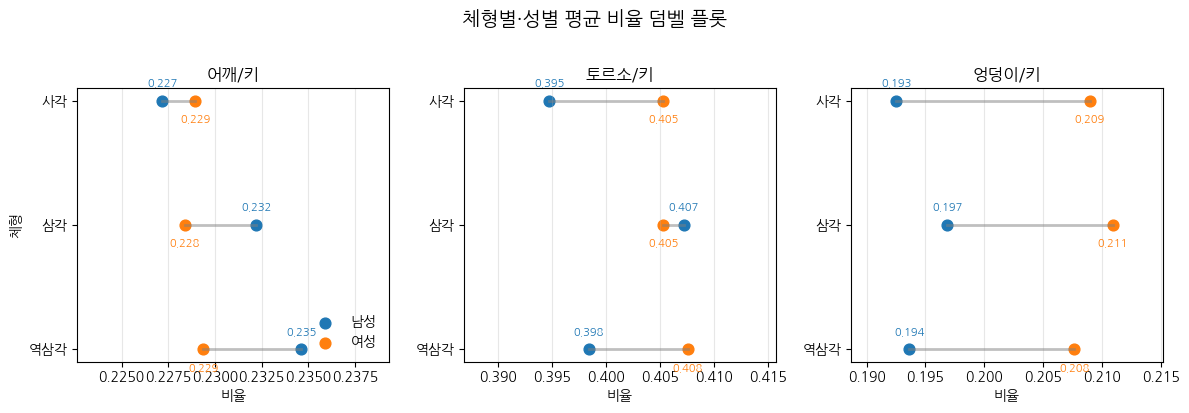

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ── 1) 체형 순서 고정
shape_order = ["역삼각", "삼각", "사각"]
ratio_df["shape"] = pd.Categorical(ratio_df["shape"],
                                   categories=shape_order, ordered=True)

metrics = {
    "shoulder/height": "어깨/키",
    "torso/height"   : "토르소/키",
    "hip/height"     : "엉덩이/키"
}

avg = (ratio_df
       .groupby(["shape","sex"])
       [list(metrics)].mean()
       .reset_index())

fig, axes = plt.subplots(1, 3, figsize=(12,4), sharey=False)

for ax, (metric, label) in zip(axes, metrics.items()):
    sub = avg.pivot(index="shape", columns="sex", values=metric).loc[shape_order]
    
    ax.scatter(sub["남성"], sub.index, color="#1f77b4", s=60, label="남성" if metric=="shoulder/height" else "")
    ax.scatter(sub["여성"], sub.index, color="#ff7f0e", s=60, label="여성" if metric=="shoulder/height" else "")
    
    for y, (m_val, w_val) in enumerate(zip(sub["남성"], sub["여성"])):
        ax.plot([m_val, w_val], [y, y], color="gray", lw=2, alpha=0.5)
        ax.text(m_val, y+0.1, f"{m_val:.3f}", ha="center", va="bottom", fontsize=8, color="#1f77b4")
        ax.text(w_val, y-0.1, f"{w_val:.3f}", ha="center", va="top",    fontsize=8, color="#ff7f0e")
    
    ax.set_title(label)
    ax.set_xlabel("비율")
    ax.set_xlim(sub.values.min()*0.98, sub.values.max()*1.02)
    ax.grid(axis="x", alpha=0.3)
    if metric=="shoulder/height":
        ax.set_ylabel("체형")
    else:
        ax.set_ylabel("")

axes[0].legend(loc="lower right", frameon=False)
plt.suptitle("체형별·성별 평균 비율 덤벨 플롯", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()


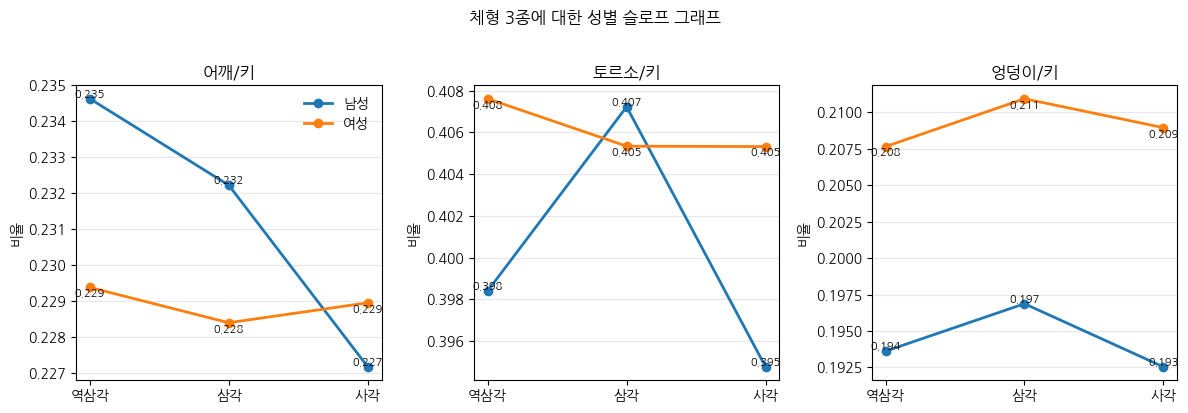

In [ ]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

# 체형 순서 고정
shape_order = ["역삼각", "삼각", "사각"]
ratio_df["shape"] = pd.Categorical(ratio_df["shape"], categories=shape_order, ordered=True)

metrics = {
    "shoulder/height": "어깨/키",
    "torso/height"   : "토르소/키",
    "hip/height"     : "엉덩이/키"
}

# 체형·성별 평균값 계산
avg = (ratio_df
       .groupby(["sex", "shape"])[list(metrics)]
       .mean()
       .reset_index())

# 슬로프 그래프 함수
def slope(metric, ax):
    sub = avg.pivot(index="sex", columns="shape", values=metric).loc[["남성","여성"]]
    for sex, row in sub.iterrows():
        ax.plot(shape_order, row[shape_order], marker="o", label=sex,
                linewidth=2, markersize=6)
        # 포인트 라벨
        for x, y in zip(shape_order, row[shape_order]):
            ax.text(x, y, f"{y:.3f}", ha="center", va="bottom" if sex=="남성" else "top", fontsize=8)
    ax.set_ylabel("비율"); ax.set_xlabel("")
    ax.set_title(metrics[metric])
    ax.grid(axis="y", alpha=0.3)

fig, axes = plt.subplots(1, 3, figsize=(12,4), sharey=False)
for ax, m in zip(axes, metrics):
    slope(m, ax)
axes[0].legend(frameon=False)
plt.suptitle("체형 3종에 대한 성별 슬로프 그래프", y=1.02)
plt.tight_layout(); plt.show()


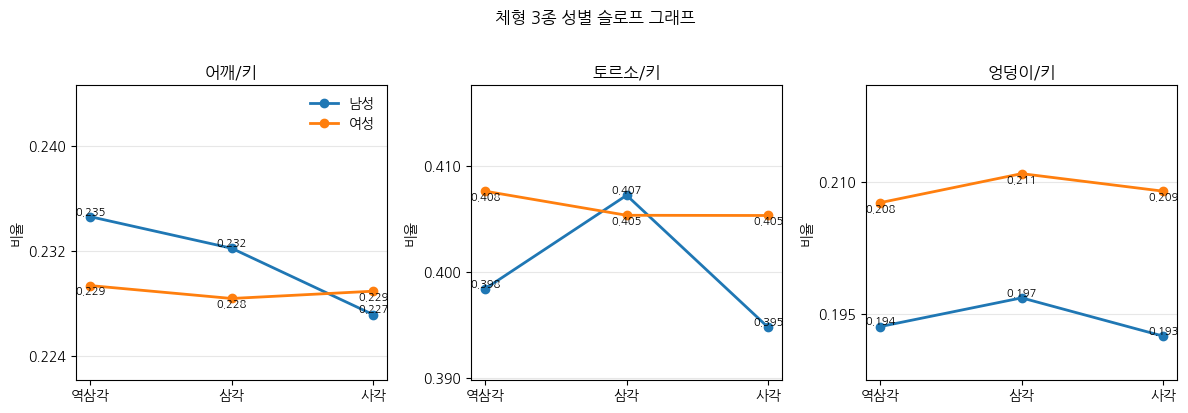


★ 남–여 차이 표 (비율 & 170 cm 기준 cm)


sex           Δ(비율)  Δ(cm)@170
      shape                   
어깨/키  역삼각    0.0052        0.9
      삼각     0.0038        0.6
      사각    -0.0018       -0.3
토르소/키 역삼각   -0.0092       -1.6
      삼각     0.0019        0.3
      사각    -0.0106       -1.8
엉덩이/키 역삼각   -0.0140       -2.4
      삼각    -0.0141       -2.4
      사각    -0.0164       -2.8

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from matplotlib.ticker import FormatStrFormatter, MaxNLocator

shape_order = ["역삼각", "삼각", "사각"]
ratio_df["shape"] = pd.Categorical(ratio_df["shape"], categories=shape_order, ordered=True)

metrics = {
    "shoulder/height": "어깨/키",
    "torso/height"   : "토르소/키",
    "hip/height"     : "엉덩이/키"
}

avg = (ratio_df
       .groupby(["sex", "shape"])[list(metrics)]
       .mean()
       .reset_index())

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for ax, (metric, label) in zip(axes, metrics.items()):
    sub = avg.pivot(index="sex", columns="shape", values=metric).loc[["남성", "여성"]]
    for sex, row in sub.iterrows():
        ax.plot(shape_order, row[shape_order], marker="o",
                linewidth=2, label=sex if metric=="shoulder/height" else "")
        for x, y in zip(shape_order, row[shape_order]):
            ax.text(x, y, f"{y:.3f}", ha="center",
                    va="bottom" if sex=="남성" else "top", fontsize=8)
    
    y_min, y_max = sub.values.min(), sub.values.max()    
    ax.set_ylim(y_min - 0.005, y_max + 0.01)              
    ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    
    
    ax.set_title(label); ax.set_ylabel("비율"); ax.set_xlabel("")
    ax.grid(axis="y", alpha=0.3)

axes[0].legend(frameon=False, loc="best")
plt.suptitle("체형 3종 성별 슬로프 그래프", y=1.02)
plt.tight_layout(); plt.show()

diff_rows = []
for metric, label in metrics.items():
    sub = avg.pivot(index="shape", columns="sex", values=metric).loc[shape_order]
    # Δ = 남 – 여 (양수면 남 > 여)
    sub["Δ(비율)"] = (sub["남성"] - sub["여성"]).round(4)

diff_table = pd.concat(diff_rows, keys=metrics.values())
print("남–여 차이 표 (비율 & 170 cm 기준 cm)")
display(diff_table)


In [ ]:
import os, re, glob, numpy as np, pandas as pd
from docx import Document
from typing import Optional, Dict

BASE_DIR = r"C:\Users\grace\OneDrive\Desktop\dataset\body_shape" 

def canon_shape(txt: str) -> Optional[str]:
    t = txt.replace(" ", "")
    if "역삼각" in t: return "inverted_triangle"
    if "삼각" in t and "역" not in t: return "triangle"
    if "사각" in t: return "rectangle"
    return None

VAR_MAP = {"(102)": "height_mm",
           "(317)": "shoulder_mm",
           "(128)": "torso_mm",
           "(120)": "hip_mm"}

def parse_docx(path: str) -> Optional[pd.DataFrame]:
    doc = Document(path)
    if not doc.tables: return None
    rows = [[c.text.strip() for c in r.cells] for r in doc.tables[0].rows]

    header = rows[0]
    col_idx: Dict[str, int] = {}
    for i, h in enumerate(header):
        shp = canon_shape(h)
        if shp: col_idx[shp] = i
    if not col_idx: return None

    records = []
    for r in rows[1:]:
        m = re.match(r"^\(\d{3}\)", r[0])  
        if not m or m.group(0) not in VAR_MAP: 
            continue
        var = VAR_MAP[m.group(0)]
        rec = {"variable": var}
        for shp, idx in col_idx.items():
            try:
                rec[shp] = float(r[idx].replace(",", ""))
            except ValueError:
                rec[shp] = np.nan
        records.append(rec)

    if not records: return None
    df = pd.DataFrame(records).set_index("variable")
    return df

dfs = []
for fp in glob.glob(os.path.join(BASE_DIR, "*.docx")):
    df = parse_docx(fp)
    if df is not None:
        dfs.append(df)
    else:
        print("[경고] 파싱 실패 →", os.path.basename(fp))

if not dfs:
    raise RuntimeError("DOCX에서 데이터를 읽지 못함.")

full = pd.concat(dfs, keys=range(len(dfs)))

abs_mean = full.groupby(level=1).mean().round(1).T 
print("절대값 평균 (mm)", abs_mean)

ratio_tbl = pd.DataFrame(index=abs_mean.index)
ratio_tbl["shoulder/height"] = abs_mean["shoulder_mm"] / abs_mean["height_mm"]
ratio_tbl["torso/height"]    = abs_mean["torso_mm"]    / abs_mean["height_mm"]
ratio_tbl["hip/height"]      = abs_mean["hip_mm"]      / abs_mean["height_mm"]
ratio_tbl["shoulder/hip"]    = abs_mean["shoulder_mm"] / abs_mean["hip_mm"]
ratio_tbl = ratio_tbl.round(3)

print("체형별 평균 비율", ratio_tbl)



📏 절대값 평균 (mm)
 variable           height_mm  hip_mm  shoulder_mm  torso_mm
inverted_triangle     1626.5   328.2        380.0     658.5
triangle              1616.1   329.0        372.3     656.5
rectangle             1624.3   326.8        370.0     653.7

📊 체형별 평균 비율
                    shoulder/height  torso/height  hip/height  shoulder/hip
inverted_triangle            0.234         0.405       0.202         1.158
triangle                     0.230         0.406       0.204         1.132
rectangle                    0.228         0.402       0.201         1.132
